## ▶ **Business Statement :**  
### ➡    **Project Title** IMDB Movie Review Sentiment Analysis        
### ➡   **Objective:**
### The primary goal of this project is to develop a robust model to classify movie reviews from the IMDB dataset into positive and negative sentiments. This analysis is crucial for understanding customer opinions and enhancing the decision-making process for various stakeholders in the entertainment industry.




# Sprint 1: Data Preparation and Analysis

### Milestone 1: Data Loading an Text Processing

In this milestone, the focus is on preparing the IMDB dataset for analysis. This includes:
1. **Loading the dataset** into the environment for manipulation.
2. **Cleaning the text data** by removing noise such as HTML tags, special characters, and stopwords.
3. **Tokenizing and normalizing reviews** for consistency and ease of further processing.

## 1. Setting Up Kaggle API
To streamline dataset retrieval, we will use Kaggle's API to download the IMDB dataset directly into our environment. This approach eliminates manual file handling, ensuring efficiency and reproducibility.  

In [2]:
# Install kaggle
!pip install kaggle
!pip install wordcloud
!pip install nltk
!pip install gensim
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### 1.1 Kaggle API


In [3]:
import os

os.environ['KAGGLE_USERNAME'] = 'aswinjd'
os.environ['KAGGLE_KEY'] = 'f648fa41f6b82add4cdbc2433688efe3'

### 1.2 Downloading and Extracting the IMDB Dataset

In [4]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## 2. Data Processing

### Steps:  
1. Import essential libraries.  
2. Load the dataset into a DataFrame.  
3. Inspect the data to ensure it's loaded properly.

### 2.1 Importing basic libraries

In [5]:
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Data loading


In [6]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 3. Exploratory Data Analysis (EDA)


Analyze the dataset for trends, distributions, and possible issues.

In [7]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

### 3.1 Check for Missing Values

In [8]:
# Check for null values
print("Missing values:\n", df.isnull().sum())

Missing values:
 review       0
sentiment    0
dtype: int64


In [9]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### 3.2 Plotting the Distribution of Sentiments
  
We aim to visualize the distribution of sentiments (positive and negative) in the IMDB dataset to understand the balance or imbalance between the two classes. This visualization helps in assessing whether any class imbalance exists, which may affect the performance of our classification model.

/var/folders/g2/wg8cg2yd079_cdlb5k53ggj00000gn/T/ipykernel_18449/3438480739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='husl')


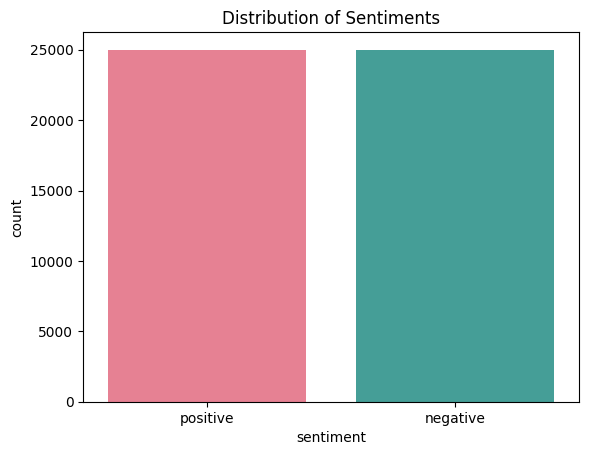

In [10]:
# Plot the distribution of sentiments
sns.countplot(x='sentiment', data=df, palette='husl')
plt.title('Distribution of Sentiments')
plt.show()

### 3.3 Word Frequency Analysis - Visualizing Common Words in Positive Reviews
In this step, we will visualize the most common words used in positive reviews by generating a **word cloud**. A word cloud helps in identifying the frequently occurring words in a dataset, which provides insight into the themes or sentiments associated with the positive and negative reviews.


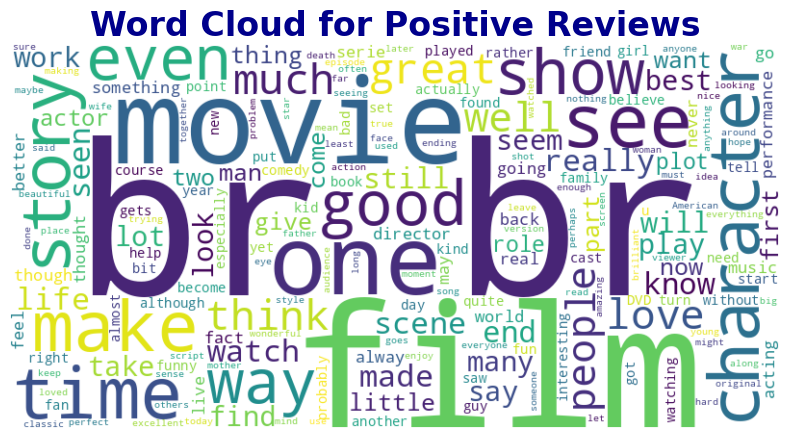

In [11]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize = 24, fontweight='bold', color='darkblue')
plt.show()

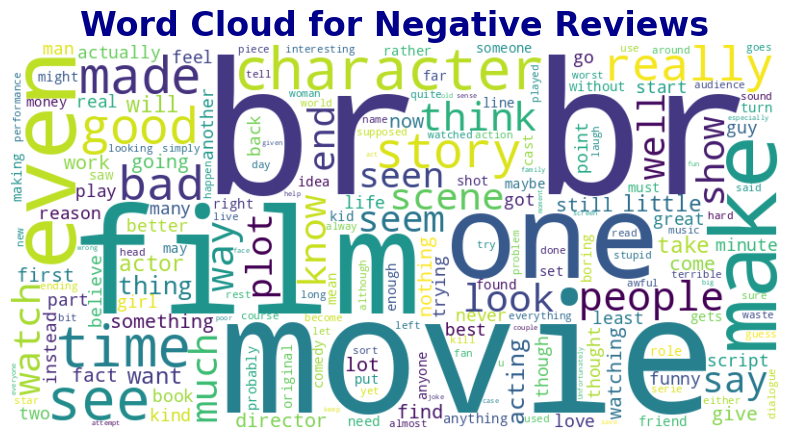

In [12]:
# Word cloud for negative reviews
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize = 24, fontweight='bold', color='darkblue')
plt.show()

## 4. Text Preprocessing - Clean, Tokenize, and Normalize Text for Feature Extraction

In this step, we will clean and preprocess the text data to prepare it for feature extraction. This includes several key preprocessing tasks such as:
1. **Cleaning the text**: Removing unwanted characters, symbols, and stopwords.
2. **Tokenizing the text**: Breaking the text into individual words or tokens.
3. **Normalizing the text**: Lowercasing, removing stopwords, and performing stemming or lemmatization to reduce words to their base forms.


### 4.1 Import Libraries

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading required packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Initialize lemmatizer
lm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aswinjd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aswinjd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aswinjd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/aswinjd/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aswinjd/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
# Removing the word 'not' from the stop words
stop_words = set(stopwords.words('english'))
stop_words.discard('not')
print(stop_words)

{'will', 'each', 'ourselves', 'or', "you're", 'yourself', 'through', 'why', 'above', 'having', 'who', 's', 'here', 'after', 'over', 'ma', 'before', 'isn', 'more', "weren't", "isn't", 'can', 'into', 'mustn', 've', 'y', 'about', 'weren', 'until', 'because', 'been', "that'll", 'ours', 'did', 'mightn', 'at', 'they', 'with', 'such', 'll', 'their', 'same', 'these', 'my', "don't", 'd', 'ain', 'haven', "haven't", 'theirs', 'too', 'had', 'is', "hasn't", 'both', 'be', 'wouldn', 'all', "should've", 'so', 'doing', 'yourselves', 'to', 'you', 'that', 'has', "doesn't", 'our', 'and', 'below', 'we', 'hers', 'than', 'does', 'then', 'she', 'for', 'down', 're', "you'll", 'very', 'the', 'have', 'under', "you'd", 'your', 'it', 'itself', 'nor', 'shan', 'm', 'yours', 'them', 'those', 'were', 't', 'should', 'but', "mightn't", 'whom', 'from', 'him', 'shouldn', 'a', 'some', 'hasn', 'between', 'its', 'needn', 'i', 'himself', 'herself', "you've", "needn't", 'was', 'there', "hadn't", "won't", 'won', 'any', 'how', '

### 4.2 Preprocessing Function

In [15]:
# Text cleaning function
def clean_text(text):
    # Remove HTML tags (Since ther is a lot of '<br>' tags)
    text = re.sub(r'<[^>]+>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

# Text tokentization
def tokenize_text(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

# Apply Lemmataization
def lemmatize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lm.lemmatize(word) for word in tokens])

**Why Lemmatization?**

* Context-aware: It handles grammatical context (e.g., better → good).
* Improved Accuracy: Better suited for tasks like sentiment analysis and topic modeling.
* Linguistic Correctness: Produces valid words compared to stemming.

In [16]:
# Applying all the text processing steps
def preprocess_pipeline(text):
    text = clean_text(text)         # Clean text
    text = tokenize_text(text)      # Tokenize and remove stopwords
    text = lemmatize_text(text)     # Lemmatize tokens
    return text

df['cleaned_review'] = df['review'].apply(preprocess_pipeline)

df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## 5. Feature Extraction
Convert text reviews into numerical representations.

### 5.1 TF-IDF Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (50000, 5000)


### 5.2 Word Embeddings
If embeddings like Word2Vec are preferred, follow this section.

In [18]:
from gensim.models import Word2Vec

# Train Word2Vec model
w2v_model = Word2Vec(sentences=df['cleaned_review'], vector_size=100, window=5, min_count=2, workers=4)

# Sprint 2: Modle Building and Evaluation

## Milestone:

1. Build machine learning models for sentiment analysis using the cleaned IMDB dataset.
2. Train the models on labeled data and evaluate their performance.
3. Fine-tune the models for improved accuracy and robustness.

## 6. Model Building

### 6.1 Importing necessary libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 6.2 Splitting dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.3 Training the model

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 6.4 Create a Pipeline

In [22]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipe.fit(df['cleaned_review'], y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

## 7. Model Evaluation

### 7.1 Importing evaluation functions

In [25]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, auc

### 7.2 Prediction

In [26]:
y_pred = model.predict(X_test)
X_test, y_pred

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.08709847, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([0, 1, 0, ..., 1, 0, 1]))

### 7.3 Lose calculation using RMSE

**Mean Squared Error (MSE)**
The MSE measures the average squared difference between the predicted values (
𝑦
^
𝑖
y
^
​
  
i
​
 ) and the actual values (
𝑦
𝑖
y
i
​
 ). It emphasizes larger errors due to squaring.

In [27]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.1138


**Root Mean Squared Error (RMSE)**
The RMSE is the square root of the MSE, which makes it more interpretable because its units match the target variable's units.

In [28]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.33734255586866


### 7.4 Evaluation report of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

In [29]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### 7.5 Confusion Matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4326  635]
 [ 503 4536]]


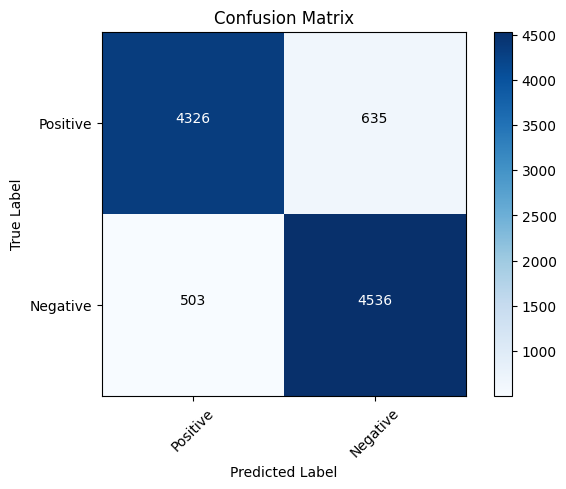

In [31]:
import matplotlib.pyplot as plt

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['Positive', 'Negative']
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 7.6 AUC-ROC Curve

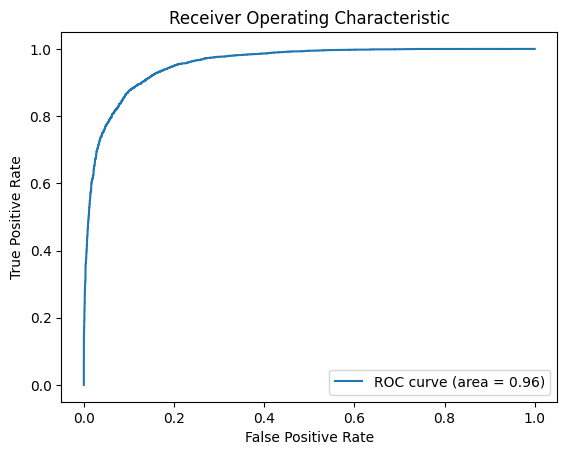

In [32]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

### 7.7 Comparision between various models

In [46]:
# Importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Predict and calculate accuracy
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.85


In [48]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Predict and calculate accuracy
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.71


In [49]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Predict and calculate accuracy
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")

K-Nearest Neighbors Accuracy: 0.74


In [50]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Predict and calculate accuracy
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Naive Bayes Accuracy: 0.85


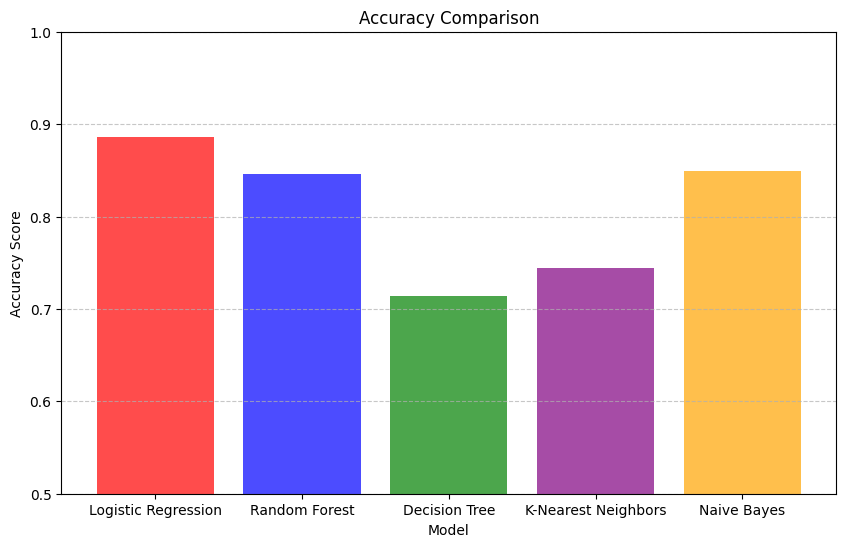

In [51]:
# Model names and accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Naive Bayes']
accuracy_scores = [accuracy, accuracy_rf, accuracy_dt,  accuracy_knn, accuracy_nb]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['red', 'blue', 'green', 'purple', 'orange'], alpha=0.7)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sprint 3: Post-evaluation and Performance improvements

## 8. Error Handling

### 8.1 Class Imbalance Detection and Handling (Synthetic Minority Oversampling Technique)

In [42]:
from imblearn.over_sampling import SMOTE

def handle_class_imbalance(X_train_tfidf, y_train):
    print("Original class distribution:", np.bincount(y_train))
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)
    print("Balanced class distribution:", np.bincount(y_train_balanced))
    return X_train_balanced, y_train_balanced

# Handling Class Imbalance
X_train_balanced, y_train_balanced = handle_class_imbalance(X_train, y_train)

Original class distribution: [20039 19961]
Balanced class distribution: [20039 20039]


### 8.2 L2 Regularization

In [52]:
from sklearn.linear_model import LogisticRegression

def apply_regularization(X_train_balanced, y_train_balanced):
    model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
    model.fit(X_train_balanced, y_train_balanced)
    return model

# Applying Regularization
model_l2 = apply_regularization(X_train_balanced, y_train_balanced)

# Predictions
y_pred = model.predict(X_test)

### 8.3 Edge Case for Evaluation Metrics

In [53]:
def handle_edge_case():
    try:
        edge_case_metrics = classification_report([0], [0], output_dict=True)  # Testing with all-zero predictions
        print("Edge case handled successfully.")
        return edge_case_metrics
    except Exception as e:
        print(f"Error handling edge case: {e}")
        return None

# Handle Edge Case
handle_edge_case()

Edge case handled successfully.


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1.0}}

## 9. Performance Improvement

### 9.1 Misclassification Sample Retrieval

In [58]:
from sklearn.preprocessing import LabelEncoder

# Fit the LabelEncoder with the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_test)

def get_misclassified_samples(X_test, y_test, y_pred, label_encoder):
    misclassified_indices = (y_test != y_pred)
    misclassified_reviews = X_test[misclassified_indices]
    misclassified_labels = label_encoder.inverse_transform(y_test[misclassified_indices])
    misclassified_preds = label_encoder.inverse_transform(y_pred[misclassified_indices])

    misclassified_samples = pd.DataFrame({
        'Review': misclassified_reviews,
        'True Label': misclassified_labels,
        'Predicted Label': misclassified_preds
    })

    print(f"Misclassified Samples: {misclassified_samples.shape[0]}")
    return misclassified_samples

# Misclassification Sample Retrieval
misclassified_samples = get_misclassified_samples(X_test[:, 0], y_test, y_pred, label_encoder)
print(misclassified_samples.head())

Misclassified Samples: 1138
   Review  True Label  Predicted Label
0     0.0           1                0
1     0.0           1                0
2     0.0           1                0
3     0.0           1                0
4     0.0           1                0


### 9.2 Hyperparameter Tuning

#### 9.2.1 Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

def grid_search_hyperparameters(X_train, y_train):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
        'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Solvers supported by Logistic Regression
        'max_iter': [100, 200, 300, 500],  # Maximum number of iterations
    }
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Hyperparameter Tuning - Grid Search
best_model = grid_search_hyperparameters(X_train_balanced, y_train_balanced)

/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aswinjd/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

KeyboardInterrupt: 

**Note** : Since Grid search takes up a lot of time we have discarded the process after half and hour and proceeded with Early Stopping. 

#### 9.2.2 Early Stopping

In [63]:
from sklearn.base import clone

def early_stopping_model(model, X_train_balanced, y_train_balanced, patience=5, max_epochs=100):
    # Split the training data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)
    
    best_model = None
    best_score = 0
    no_improvement_count = 0

    for epoch in range(1, max_epochs + 1):
        model.fit(X_train_split, y_train_split)
        val_predictions = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_predictions)

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_model = clone(model)
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    return best_model

# Early Stopping Model
print("Logistic Regression Model:")
new_best_model = early_stopping_model(model, X_train_balanced, y_train_balanced)
# Apply early stopping for K-Nearest Neighbors
print("K Nearest Neighbout Model:")
best_knn_model = early_stopping_model(knn_model, X_train_balanced, y_train_balanced)

# Apply early stopping for Decision Tree
print("Decission Tree Model:")
best_dt_model = early_stopping_model(dt_model, X_train_balanced, y_train_balanced)

# Apply early stopping for Random Forest
print("Random Forest Model:")
best_rf_model = early_stopping_model(rf_model, X_train_balanced, y_train_balanced)

# Apply early stopping for Naive Bayes
print("Naive Bayers Model:")
best_nb_model = early_stopping_model(nb_model, X_train_balanced, y_train_balanced)

Logistic Regression Model:
Early stopping at epoch 6
K Nearest Neighbout Model:
Early stopping at epoch 6
Decission Tree Model:
Early stopping at epoch 6
Random Forest Model:
Early stopping at epoch 6
Naive Bayers Model:
Early stopping at epoch 6


### 9.3 Modle Re-evaluation

In [67]:
# 6. Model Re-evaluation
def re_evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Re-evaluated Model Metrics:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    return accuracy, precision, recall, f1

# Re-evaluate models and collect metrics
models = {
    "Logistic Regression": new_best_model,
    "K Nearest Neighbors": best_knn_model,
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "Naive Bayes": best_nb_model
}

metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train_balanced, y_train_balanced)
    accuracy, precision, recall, f1 = re_evaluate_model(model, X_test, y_test)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

Logistic Regression
Re-evaluated Model Metrics:
Accuracy: 0.89, Precision: 0.88, Recall: 0.90, F1-Score: 0.89
K Nearest Neighbors
Re-evaluated Model Metrics:
Accuracy: 0.57, Precision: 0.54, Recall: 0.95, F1-Score: 0.69
Decision Tree
Re-evaluated Model Metrics:
Accuracy: 0.72, Precision: 0.73, Recall: 0.72, F1-Score: 0.72
Random Forest
Re-evaluated Model Metrics:
Accuracy: 0.85, Precision: 0.86, Recall: 0.84, F1-Score: 0.85
Naive Bayes
Re-evaluated Model Metrics:
Accuracy: 0.85, Precision: 0.85, Recall: 0.86, F1-Score: 0.85


### 9.4 Visualization after Re-evaluation

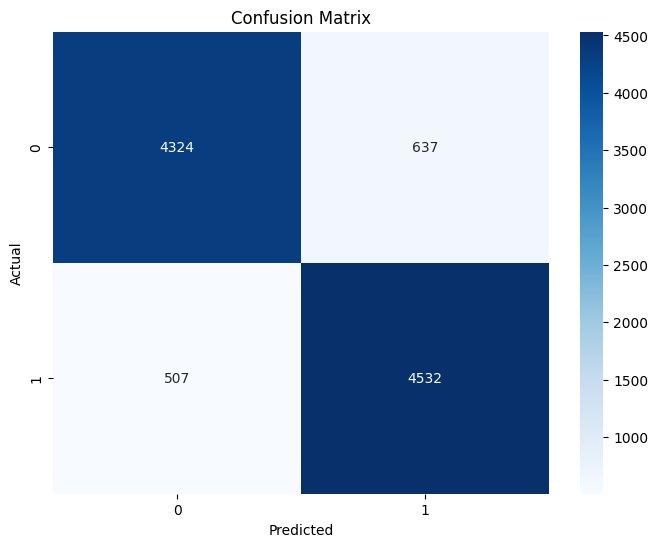

True Negatives: 4324, False Positives: 637, False Negatives: 507, True Positives: 4532


array([[4324,  637],
       [ 507, 4532]])

In [69]:
def plot_confusion_matrix(y_test, y_pred, label_encoder):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Validate TP, FP, FN, TN
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
    return cm

# Confusion Matrix Visualization
y_pred = new_best_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, label_encoder)

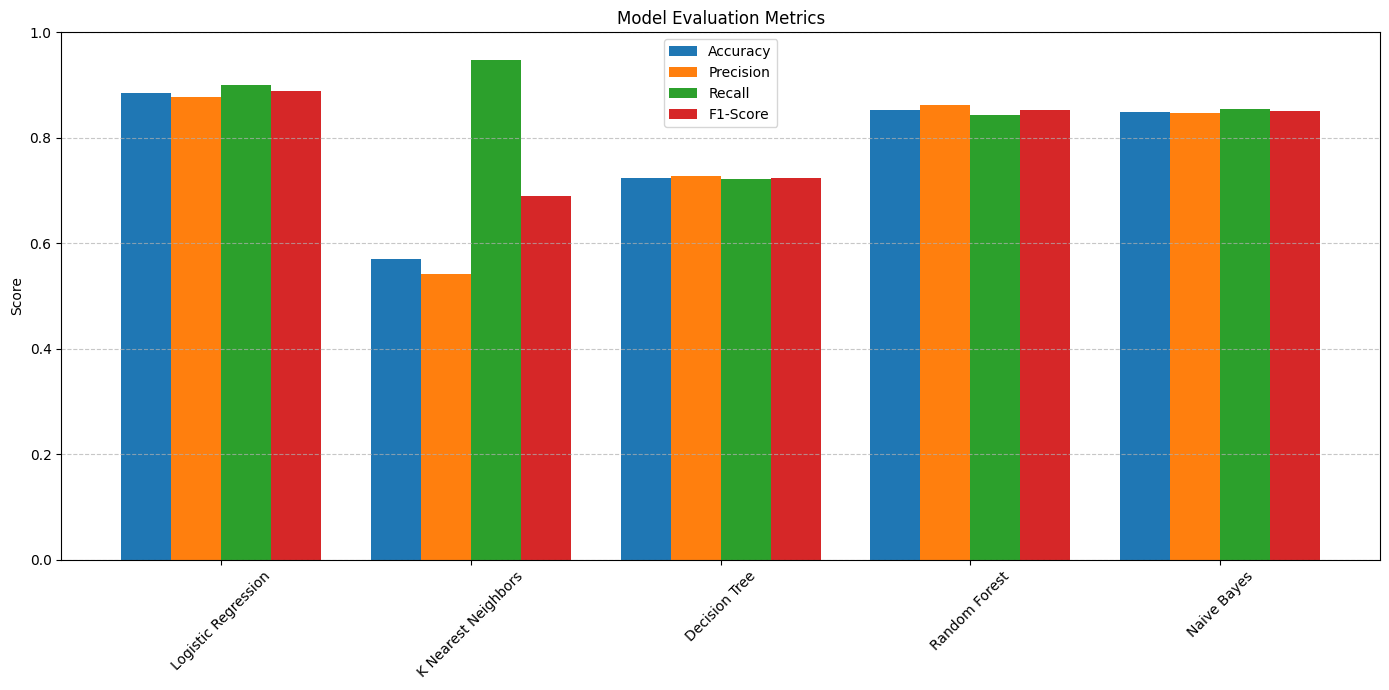

In [68]:
# Visualization
metric_names = list(metrics.keys())
model_names = list(models.keys())
x = np.arange(len(model_names))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

for i, metric_name in enumerate(metric_names):
    ax.bar(x + i * width, metrics[metric_name], width, label=metric_name)

ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x + width * (len(metric_names) - 1) / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Sprint 4: Deployment

## 10. Saving the model

In [26]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Models saved successfully.")

Models saved successfully.


## 11. Deploying the application

### 11.1 Installing the required libraries for deployment

In [34]:
!pip install streamlit pyngrok


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### 11.2 Configuring Ngrok Authentication

In [33]:
!rm -rf ~/.ngrok2/ngrok.yml
!ngrok config add-authtoken 2qniCXNAvZwqnUmyrC5VzthMTJ1_5eFZD86xFmxS2FqHMNXLT

Authtoken saved to configuration file: /Users/aswinjd/Library/Application Support/ngrok/ngrok.yml


### 11.3 Extraction of the saved models

In [35]:
# Load the pickled model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the pickled TfidfVectorizer
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

In [39]:
def classify_comment(comment):
    comment_tfidf = tfidf_vectorizer.transform([comment])
    prediction = model.predict(comment_tfidf)
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

### 11.4 Building a Streamlit App

In [47]:
%%writefile app.py

import streamlit as st

# App Title and Description
st.title('🎥 AI-Based IMDB Movie Review Analyst')
st.subheader('Analyze Movie Reviews Like a Pro!')
st.markdown("""
    Welcome to the **AI-Based IMDB Movie Review Analyst**!  
    This app uses cutting-edge **AI technology** to analyze the sentiment of movie reviews.  
    Enter a review below, and let the AI classify it as **Positive** or **Negative**.  
    Perfect for movie enthusiasts, researchers, and industry professionals! 🍿🎬
""")

# Sidebar for Input Instructions
st.sidebar.header("About This App")
st.sidebar.markdown("""
    This app leverages **Natural Language Processing (NLP)** to understand sentiments in movie reviews.  
    👉 **Instructions**:  
    - Enter an IMDB review in the text box.  
    - Click 'Analyze Sentiment' to see the result.  
    - Explore insights into the review sentiment.
""")

# User Input
review = st.text_area('Enter an IMDB Movie Review:', placeholder="Type your review here...")

# Sentiment Analysis
if st.button('Analyze Sentiment'):
    if review.strip():
        sentiment = classify_comment(review)
        st.success(f"The sentiment of the review is: **{sentiment}**")
    else:
        st.warning('⚠️ Please enter a movie review to analyze.')

Overwriting app.py


### 11.5 Hosting the application in the server 

In [1]:
import subprocess
from pyngrok import ngrok

# Start the Streamlit app as a subprocess
process = subprocess.Popen(["streamlit", "run", "app.py"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Create a public HTTP tunnel for port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

SyntaxError: incomplete input (578364370.py, line 9)